# Analysis of mitochondrial distribution following RSV1 infection
Visual assessment suggests different mitochondrial distribution in RSV treat Cos cells. In particular, mitochondria seem to contract around the nucleus ~12hr post infection and gradually get more and more contracted until 24hr PI.

In [2]:
%matplotlib inline
import os
import javabridge
import bioformats
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyome as ome
import seaborn as sns
from functools import reduce
from itertools import chain
from matplotlib import transforms
from mito import mito, plot

In [3]:
# Initialise JVM
javabridge.start_vm(class_path=bioformats.JARS, max_heap_size="8G")

In [4]:
# Experiment to quantify mitochondrial distribution under RSV1 infection
mito_1_path = "/Users/keithschulze/Google Drive/Projects/Jans Lab/data/CONFOCAL IMAGES RSV ON A549 CELLS"
output_path = os.path.join(mito_1_path, "output_v4")

mito_1_mock_12h = os.path.join(mito_1_path, "12h mock MitoTrackerRed+RSV+DAPI", "12h mock.lif")
mito_1_mock_18h = os.path.join(mito_1_path, "18h mock MitoTrackerRed+RSV+DAPI", "18h mock.lif")
mito_1_mock_24h = os.path.join(mito_1_path, "24h mock MitoTrackerRed+RSV+DAPI", "24h mock.lif")
mito_1_rsv_12h = os.path.join(mito_1_path, "12h RSV1 MitoTrackerRed+RSVGreen+DAPI", "12h RSV1.lif")
mito_1_rsv_18h = os.path.join(mito_1_path, "18h RSV1 MitoTrackerRed+RSVGreen+DAPI", "18h RSV1.lif")
mito_1_rsv_24h = os.path.join(mito_1_path, "24h RSV1 MitoTrackerRed+RSVGreen+DAPI", "24h RSV1.lif")

mito_1_input = [(mito_1_mock_12h, "Mock", "12h", output_path),
                (mito_1_mock_18h, "Mock", "18h", output_path),
                (mito_1_mock_24h, "Mock", "24h", output_path),
                (mito_1_rsv_12h, "RSV1", "12h", output_path),
                (mito_1_rsv_18h, "RSV1", "18h", output_path),
                (mito_1_rsv_24h, "RSV1", "24h", output_path)]

min_nuc_distance = 10
min_nuc_area = 500
min_mito_area = 50
rsv_threshold = 10

r90 = pd.concat(map(pd.concat, (mito.process_r90(pth, inf, t, out, 
                                   dapi_index=0,
                                   mito_index=2,
                                   rsv_index=1,
                                   min_nucleus_distance=min_nuc_distance,
                                   min_nucleus_area=min_nuc_area,
                                   min_mito_area=min_mito_area, 
                                   infection_threshold=rsv_threshold)
                             for pth, inf, t, out in mito_1_input)), ignore_index=True)

Unable to segment any entire cells in 12h mock_12h mock-7


/Users/keithschulze/miniconda3/envs/mito/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


Unable to segment any entire cells in 12h mock_12h mock-8


## Summarise and plot R90%

In [5]:
## Output number of cells analysed
r90.groupby(['Pathogen', 'Treatment']).size().to_csv(os.path.join(output_path, "cell_counts.csv"))

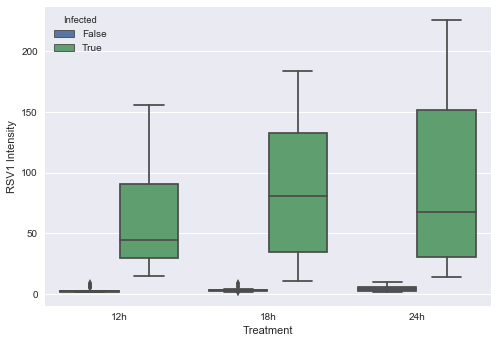

In [6]:
# Plot distribution of mean RSV1 intensity
sns.boxplot(x="Treatment", y="RSV1 Intensity", hue="Infected", data=r90)

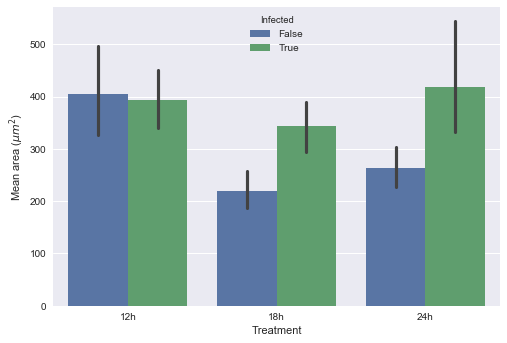

In [7]:
# Plot mean mitochondria area
area_fig, ax1 = plt.subplots()
sns.barplot(x="Treatment", y="Area", hue="Infected", data=r90, ax=ax1)
ax1.set_xlabel("Treatment")
ax1.set_ylabel(r"Mean area ($\mu m^2$)")

In [8]:
# Save area plot
area_fig.savefig(os.path.join(output_path, "area_plt.pdf"))

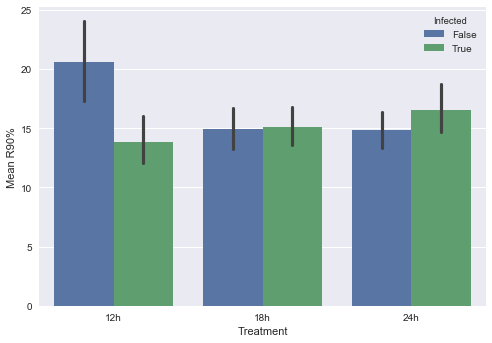

In [9]:
# Plot mean R90%
r90_fig, ax1 = plt.subplots()
sns.barplot(x="Treatment", y="R90%", hue="Infected", data=r90, ax=ax1)
ax1.set_xlabel("Treatment")
ax1.set_ylabel("Mean R90%")

In [10]:
# Save R90% figure
r90_fig.savefig(os.path.join(output_path, "r90_plt.pdf"))

In [11]:
# Save Area and R90% data frame
r90.to_csv(os.path.join(output_path, "rsv.csv"))

In [12]:
javabridge.kill_vm()